# 1.4. AirBnB Project Template

## Imports

In [1]:
# 
# MULTI LAYER PERCEPTRON - ARTIFICIAL NEURAL NETWORK - OPTIMIZED NETWORK
# Added custom metrics
# 

import numpy as np # conda install numpy
import tensorflow as tf
import matplotlib.pyplot as plt # conda install matplotlib
import pandas as pd # conda install pandas
import warnings
import seaborn as sns # conda install seaborn - Python data visualization library based on matplotlib

warnings.filterwarnings('ignore')

print(tf.__version__)


2.15.0


## Load data and take a look at it - all data MUST be numeric

In [2]:
data = pd.read_csv('airbnb new york.csv').sample(frac=1) # returns a random sample of the whole dataframe (frac=1)
print('\n*** Data head\n')
data.head()
#print('\n*** Data describe\n')
#data.describe()



*** Data head



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
35712,28344470,20 steps to subway!!,131392140,Vik,Queens,Long Island City,40.75655,-73.93001,Entire home/apt,134,2,9,2019-06-22,0.93,5,163
18552,14633272,South Williamsburg,43810721,Mikey,Brooklyn,Williamsburg,40.71082,-73.95736,Private room,50,1,15,2019-04-18,0.44,1,0
37567,29801175,Large private bedroom 1 stop from Manhattan,152202371,Richard,Bronx,Mott Haven,40.81000,-73.92654,Private room,65,1,35,2019-07-02,4.32,1,295
30609,23671775,Large and beautiful room in Bedford,129483977,Vincent,Brooklyn,Williamsburg,40.71166,-73.96054,Private room,60,2,0,NaN,NaN,1,0
33093,26110133,Luxurious 2 Bedroom Apartment,196274503,Patience,Queens,Bayswater,40.60606,-73.75492,Entire home/apt,120,1,23,2019-03-02,1.81,1,189


## Data preprocessing

In [3]:
features = data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
print('*** Columns\n', features.head())
# the above print display that neighbourhood and room_type have categorical values

print('\n*** Missing values\n', features.isna().sum()) 
# isna() return a boolean same-sized object indicating if the values are NA - None or numpy.NaN - and they get mapped to True values.
# the above features.isna().sum() shows that 'reviews_per_month' has several thousands od NA (missing) values.

features['reviews_per_month'] = features['reviews_per_month'].fillna(0) # fill NA missing values with 0s
print('\n*** Cleaned data\n', features.isna().sum()) # it shows data is cleaned

# get onehot encoding with pd.get_dummies()
onehot_neighborhood_group = pd.get_dummies(features['neighbourhood_group'])
onehot_room_type = pd.get_dummies(features['room_type'])
print('\n*** onehot encoded data\n', onehot_neighborhood_group)
print('\n', onehot_room_type)

features = features.drop(columns=['neighbourhood_group', 'room_type']) # drop columns with categorical data
features = pd.concat([features, onehot_neighborhood_group, onehot_room_type], axis=1) # concatenate dataframe with onehot encoded columns
print('\n*** Processed data\n', features.head()) # observe updated features 

targets = data['price'] # get the targets
train_size = int(0.7 * len(data)) # 70% od data will be used for training purposes

# gets 70% of rows with all columns for X_test, and the remaining 30% of rows with all columns 
X_train, X_test = features.values[:train_size, :], features.values[train_size:, :]
y_train, y_test = targets.values[:train_size], targets.values[train_size:]
print('\nTotal number of columns\n', len(X_test[0]))

*** Columns
       neighbourhood_group        room_type  minimum_nights  number_of_reviews  \
35712              Queens  Entire home/apt               2                  9   
18552            Brooklyn     Private room               1                 15   
37567               Bronx     Private room               1                 35   
30609            Brooklyn     Private room               2                  0   
33093              Queens  Entire home/apt               1                 23   

       reviews_per_month  calculated_host_listings_count  availability_365  
35712               0.93                               5               163  
18552               0.44                               1                 0  
37567               4.32                               1               295  
30609                NaN                               1                 0  
33093               1.81                               1               189  

*** Missing values
 neighbourhood_gro

## Data visualization and analysis

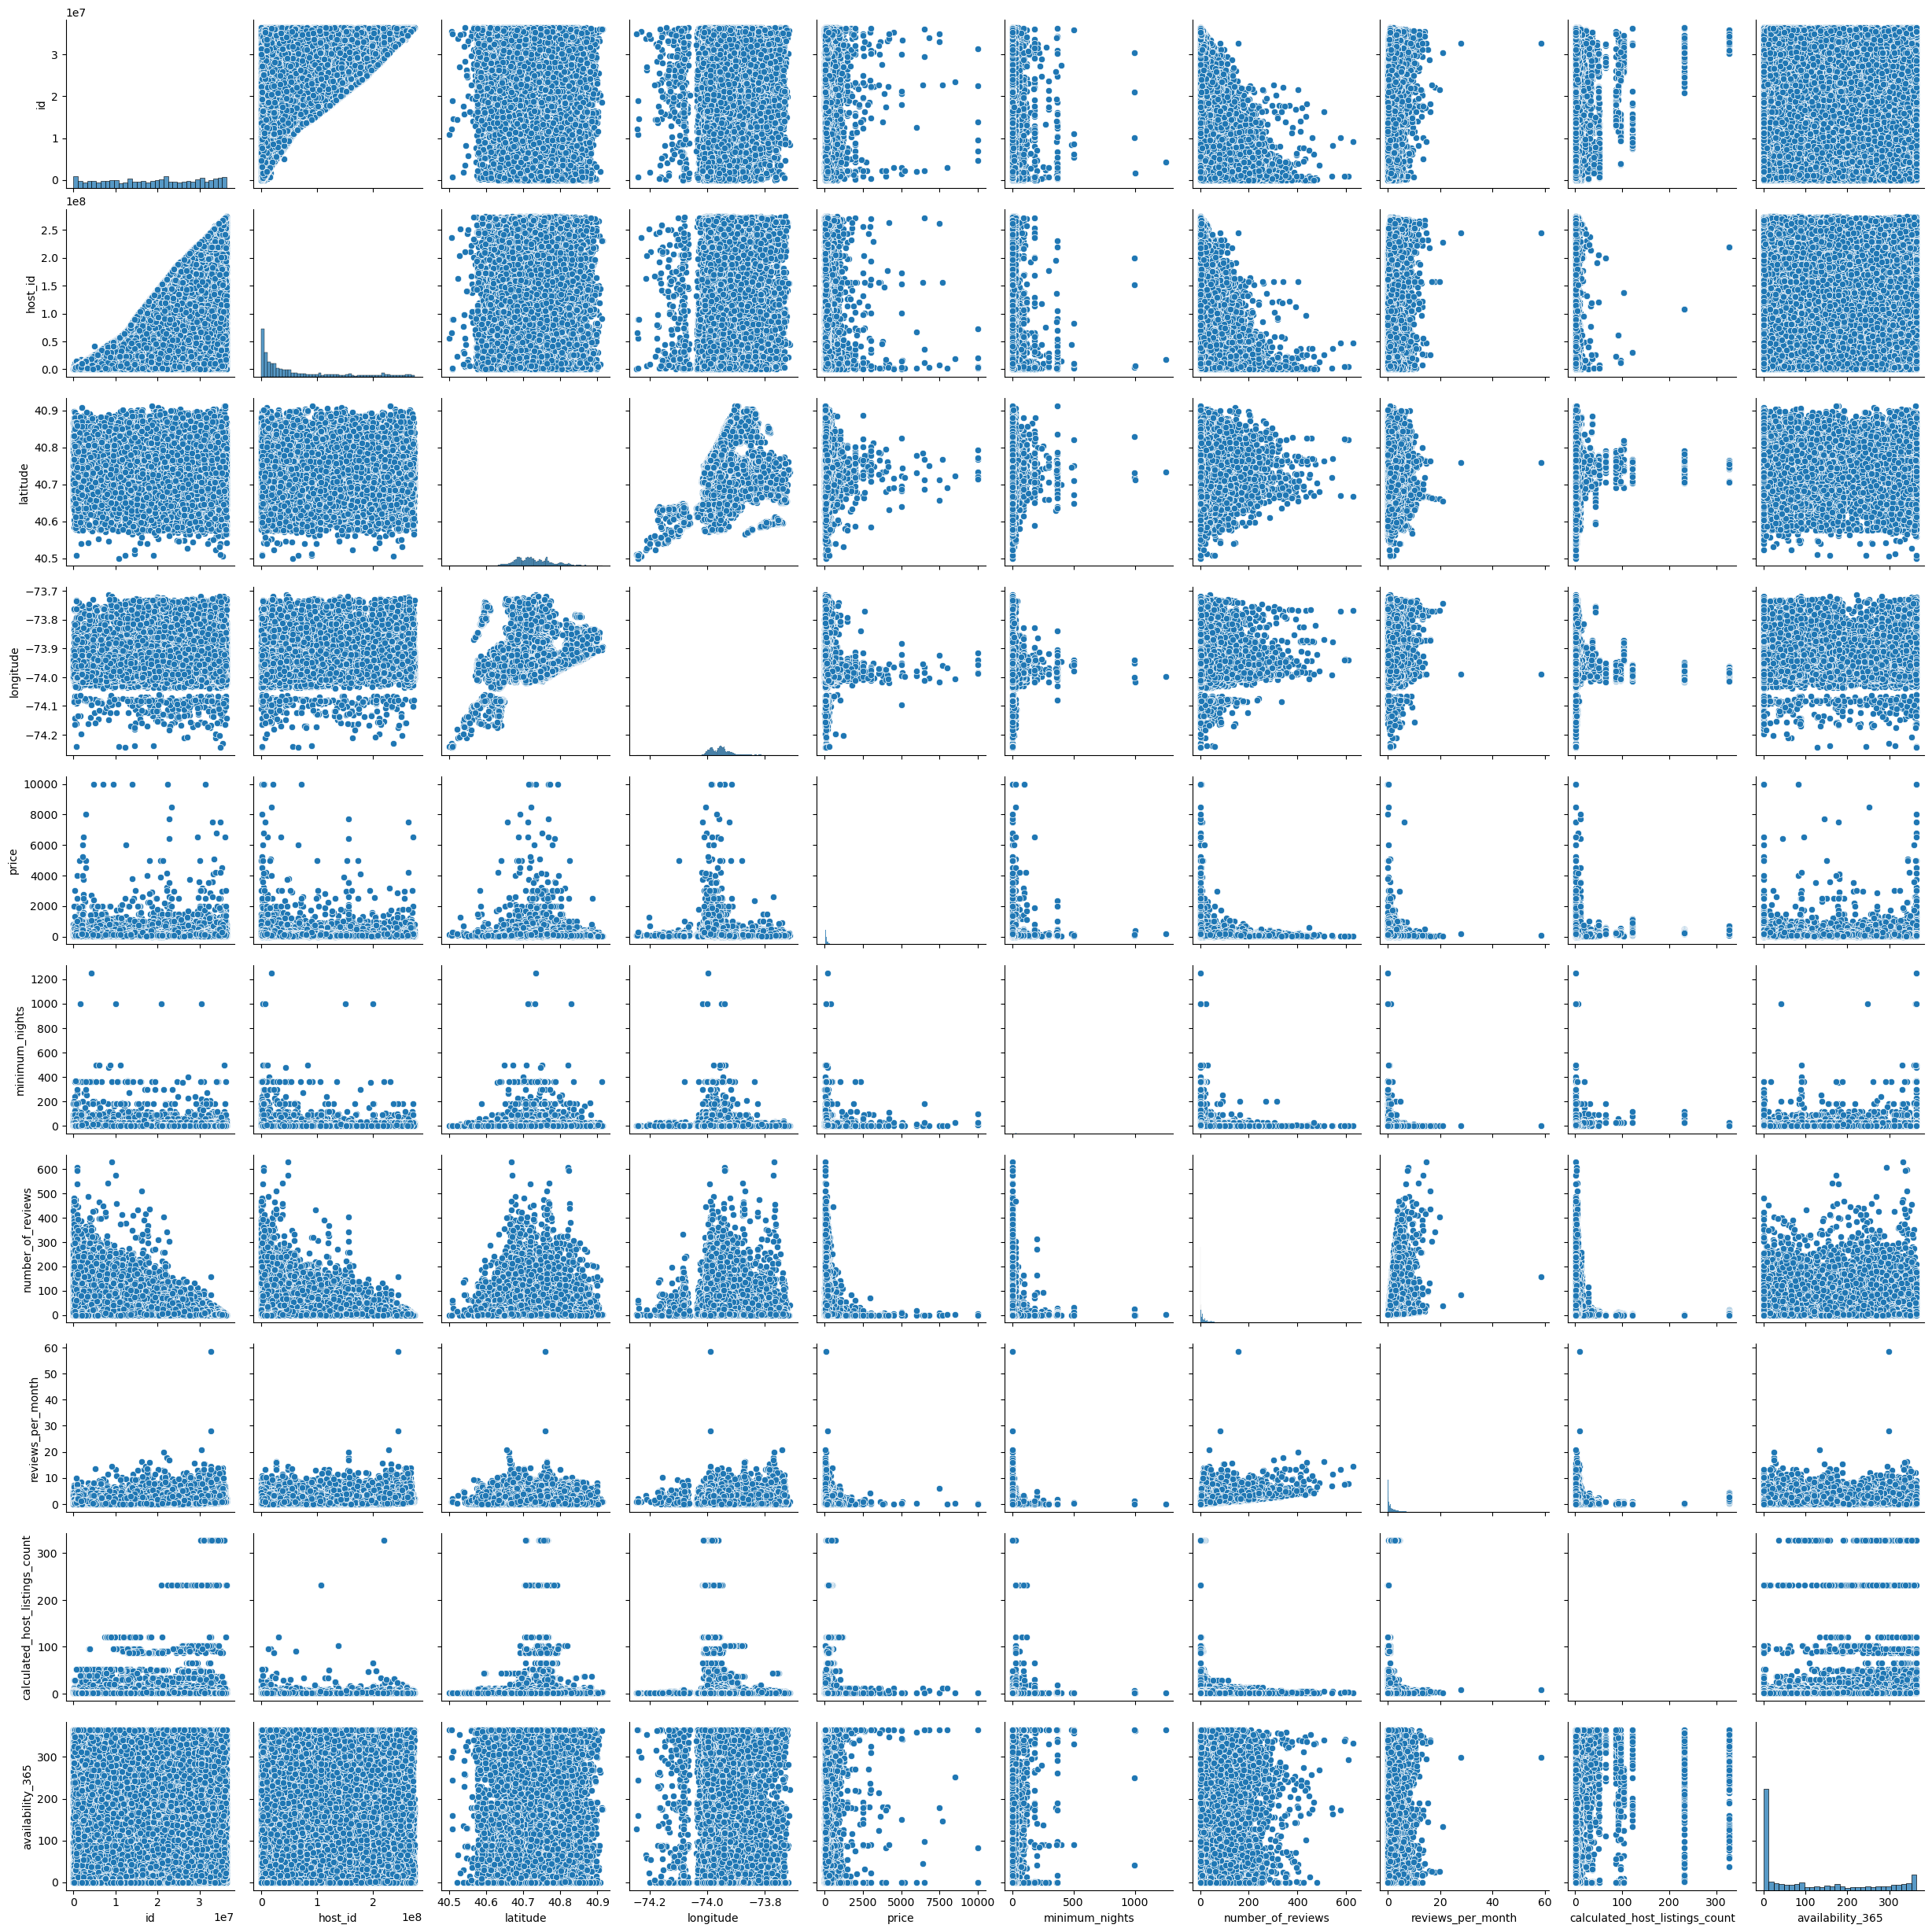

In [4]:
# pairplot() -  this function will create a grid of Axes such that each numeric variable in data will by shared
# across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated
# differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column
sns.pairplot(data)

<Axes: >

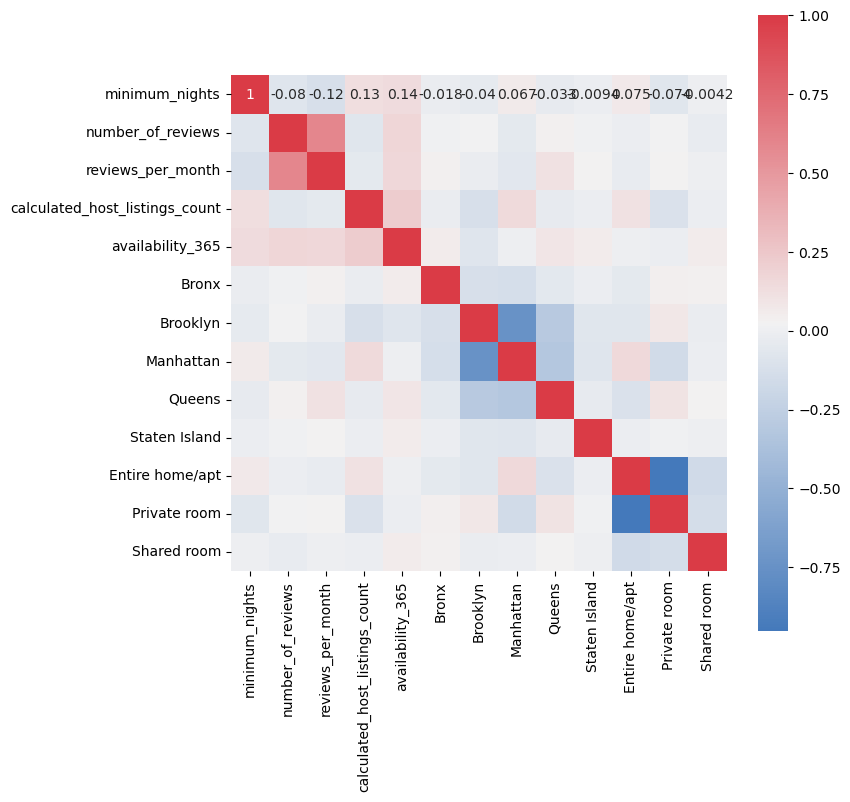

In [5]:
# corr = data.corr() # original data has categorical variables that produce errors
corr = features.corr() # corr() - Compute pairwise correlation of columns, excluding NA/null values.

cmap = sns.diverging_palette(250, 10, as_cmap=True) # Make a diverging palette between two HUSL colors.

# Create a new figure, or activate an existing figure.
# in this case the figure call with the figsize argument is used to define the size of the chart area.
plt.figure(figsize=(8, 8)) 

# heatmap() - Plot rectangular data as a color-encoded matrix.
sns.heatmap(corr, square=True, cmap=cmap, annot=True)

## The Tensorflow 2 Machine Learning Approaches
### Linear Regression
#### Model definition

In [6]:
# reused the LinearModel function from the Linear regression notebook
class LinearModel:
    def __init__(self):
        # y_pred = W*X + b
        
        # self.W = tf.Variable(13.0) - removed for being just one variable
        # self.b = tf.Variable(4.0) - removed for being just one variable
        
        # initializers define the way to set the initial random weights (note plural here) of Keras layers
        # we are moving from one variable to a multiple variable (13) linear regression model
        self.initializer = tf.keras.initializers.GlorotUniform() 

    # loss function
    def loss(self, y, y_pred):
        # calculates the mean absolute error instead of mean squared error
        # MAE treats all errors equally, minimizing the impact of outliers on the loss function.
        # MSE provides faster convergence BUT has susceptibility to outliers influence and  
        #     makes it less suitable for datasets containing anomalies
        # https://medium.com/@nirajan.acharya666/choosing-between-mean-squared-error-mse-and-mean-absolute-error-mae-in-regression-a-deep-dive-c16b4eeee603
        # return tf.reduce_mean(tf.square(y - y_pred))
        return tf.reduce_mean(tf.abs(y - y_pred))
        
    # train function
    def train(self, X, y, lr=0.00001, epochs=20, verbose=True):
        
        # asarray - converts the input to an array and ensures we are using numpy float32 arrays
        print('\n*** X before array\n', X)
        X = np.asarray(X, dtype=np.float32)
        print('\n*** X after array\n', X)
        
        # reshape() - Gives a new shape to an array without changing its data.
        print('\n*** y before array and reshape()\n', X)
        y = np.asarray(y, dtype=np.float32).reshape((-1, 1)) # [1,2,3,4] -> [[1],[2],[3],[4]]      
        print('\n*** y after array and reshape()\n', X)
        
        # use the initializer from the constructor above to initialize the multiple features' weights and biases
        # LEN(x[0]) - NUMBER OF FEATURES
        self.W = tf.Variable(initial_value=self.initializer(shape=(len(X[0]), 1), dtype='float32'))
        self.b = tf.Variable(initial_value=self.initializer(shape=(1,), dtype='float32'))
        
        def train_step():
            # GradientTape is a mathematical tool for automatic differentiation (autodiff), which is the core functionality 
            # of TensorFlow. It does not "track" the autodiff, it is a key part of performing the autodiff. It is used to
            # record ("tape") a sequence of operations performed upon some input and producing some output, so that the output
            # can be differentiated with respect to the input (via backpropagation / reverse-mode autodiff) (in order to 
            # then perform gradient descent optimization). In other words, TensorFlow "records" relevant operations executed 
            # inside the context of a tf.GradientTape onto a "tape". TensorFlow then uses that tape to compute the gradients 
            # of a "recorded" computation using reverse mode differentiation.
            with tf.GradientTape() as t:
                current_loss = self.loss(y, self.predict(X))

            # Once you've recorded some operations, use GradientTape.gradient(target, sources) to calculate the gradient of 
            # some target (often a loss) relative to some source (often the model's variables).
            # To get the gradient of loss with respect to both variables, you can pass both as sources to the gradient 
            # method. The tape is flexible about how sources are passed and will accept any nested combination of lists or
            # dictionaries and return the gradient structured the same way (see tf.nest).
            # two sources: self.W and self.b return the gradient structured in the same way: dW and db
            dW, db = t.gradient(current_loss, [self.W, self.b])
            # adjust gradient with the learning rate but because we are using tensors we use assign_sub instead of '-='
            self.W.assign_sub(lr * dW) # W -= lr * dW
            self.b.assign_sub(lr * db) # b -= lr * db
            
            return current_loss

        # calls train_step() as many times as the number of epochs
        for epoch in range(epochs):
            current_loss = train_step()
            if verbose:
                print(f'Epoch {epoch}: loss: {current_loss.numpy()}') # calls numpy() to enable eager execution
                # https://analyticsindiamag.com/beginners-guide-to-tensorflow-eager-execution-machine-learning-developers/

    def predict(self, X):
        # return self.W * X + self.b  - remove due to being just one variable
        # [a, b] x [b, c]
        # X -> [n_instances, n_features] x [n_features, 1]
        return tf.matmul(X, self.W) + self.b

#### Model instantiation

In [7]:
model = LinearModel()   # creates a model
model.train(X_test, y_test, lr=0.00001, epochs=100)   # trains the model



*** X before array
 [[5 47 2.01 ... True False False]
 [4 85 2.41 ... True False False]
 [4 107 2.73 ... True False False]
 ...
 [3 0 0.0 ... True False False]
 [2 1 0.03 ... True False False]
 [5 0 0.0 ... True False False]]

*** X after array
 [[5.00e+00 4.70e+01 2.01e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [4.00e+00 8.50e+01 2.41e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [4.00e+00 1.07e+02 2.73e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 ...
 [3.00e+00 0.00e+00 0.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [2.00e+00 1.00e+00 3.00e-02 ... 1.00e+00 0.00e+00 0.00e+00]
 [5.00e+00 0.00e+00 0.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]]

*** y before array and reshape()
 [[5.00e+00 4.70e+01 2.01e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [4.00e+00 8.50e+01 2.41e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [4.00e+00 1.07e+02 2.73e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 ...
 [3.00e+00 0.00e+00 0.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [2.00e+00 1.00e+00 3.00e-02 ... 1.00e+00 0.00e+00 0.00e+00]
 [5.00e+00 0.00e+00 0.00e+00 ... 1.0

#### Multi Layer Perceptron model (ANN - Artificial Neural Network)

In [8]:
# keras is part of tensorflow 2.x
# models.Sequential() indicates that every layer we add goes in sequential order, one after another
# A model grouping layers into an object with training/inference features.
# Sequential groups a linear stack of layers into a tf.keras.Model

# Dense(units) implements the operation: output = activation(dot(input, kernel) + bias) where 
# activation is the element-wise activation function passed as the activation argument, kernel is a weights
# matrix created by the layer, and bias is a bias vector created by the layer (only applicable if 
# use_bias is True). These are all attributes of Dense. units - Positive integer, dimensionality of the output space.

model = tf.keras.models.Sequential([
    # 1st layer - Dense() Just your regular densely-connected NN layer - 128 dimensions of output space
    # Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
    # relu - rectified linear unit activation function. With default values, this returns the standard ReLU 
    # activation: max(x, 0), the element-wise maximum of 0 and the input tensor.
    tf.keras.layers.Dense(128, activation='relu'), 
    # The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, 
    # which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
    tf.keras.layers.Dropout(0.2), # Dropout 20% of the input
    tf.keras.layers.Dense(1)    # 2nd layer - Dense() Just your regular densely-connected NN layer - 1 dimension of output space
])


In [10]:
# more metrics for better understanding
def R_squared(y_true, y_pred):
    # note use of .reduce_sum and .square tendorflow functions
    residual = tf.reduce_sum(tf.square(y_true - y_pred))
    # note use of .reduce_mean
    total = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1.0 - residual / total
    return r2

# the keras.optimizer is the equivalent of the train_step() function of the linear model
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# USE THIS OPTION BY DEFAULT AND NOT CHANGE IT UNLESS YOU KNOW WHAT YOU ARE DOING
adam_optimizer = tf.keras.optimizers.Adam()
# 
loss_fn = tf.keras.losses.MAE   # uses the Mean Absolute Error 

# The compile() method: specifying a loss, metrics, and an optimizer
# To train a model with fit(), you need to specify a loss function, an optimizer, and optionally, some metrics to monitor.
model.compile(
    optimizer=adam_optimizer, 
    loss=loss_fn,
    #ADDED METRICS HERE
    metrics=[
        tf.keras.metrics.MAE,
        tf.keras.metrics.MSE,   # mean squared error
        R_squared, # result between -1 and +1, < 0 => useless, 0 and 1 => better close to 1
    ]
)

In [11]:
print('\n*** X_train before array\n', X_train)
X_train = np.asarray(X_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)
print('\n*** X_train after array\n', X_train)
model.fit(X_train, y_train, epochs=50)



*** X_train before array
 [[2 9 0.93 ... True False False]
 [1 15 0.44 ... False True False]
 [1 35 4.32 ... False True False]
 ...
 [7 0 0.0 ... False True False]
 [4 70 3.51 ... True False False]
 [1 36 3.5 ... False True False]]

*** X_train after array
 [[ 2.    9.    0.93 ...  1.    0.    0.  ]
 [ 1.   15.    0.44 ...  0.    1.    0.  ]
 [ 1.   35.    4.32 ...  0.    1.    0.  ]
 ...
 [ 7.    0.    0.   ...  0.    1.    0.  ]
 [ 4.   70.    3.51 ...  1.    0.    0.  ]
 [ 1.   36.    3.5  ...  0.    1.    0.  ]]
Epoch 1/50


1070/1070 [==============================] - 2s 1ms/step - loss: 96.4424 - mean_absolute_error: 96.4424 - mean_squared_error: 67162.3359 - R_squared: -0.4644
Epoch 2/50
1070/1070 [==============================] - 1s 963us/step - loss: 69.0744 - mean_absolute_error: 69.0744 - mean_squared_error: 59625.7734 - R_squared: 0.1655
Epoch 3/50
1070/1070 [==============================] - 1s 908us/step - loss: 66.0614 - mean_absolute_error: 66.0614 - mean_squared_erro

In [12]:
print('\n*** X_test before array\n', X_test)
X_test = np.asarray(X_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.float32)
print('\n*** X_test after array\n', X_test)
model.evaluate(X_test, y_test)


*** X_test before array
 [[5 47 2.01 ... True False False]
 [4 85 2.41 ... True False False]
 [4 107 2.73 ... True False False]
 ...
 [3 0 0.0 ... True False False]
 [2 1 0.03 ... True False False]
 [5 0 0.0 ... True False False]]

*** X_test after array
 [[5.00e+00 4.70e+01 2.01e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [4.00e+00 8.50e+01 2.41e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [4.00e+00 1.07e+02 2.73e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 ...
 [3.00e+00 0.00e+00 0.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [2.00e+00 1.00e+00 3.00e-02 ... 1.00e+00 0.00e+00 0.00e+00]
 [5.00e+00 0.00e+00 0.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]]
459/459 [==============================] - 0s 763us/step - loss: 61.1144 - mean_absolute_error: 61.1144 - mean_squared_error: 43555.1992 - R_squared: 0.2905


[61.11443328857422, 61.11443328857422, 43555.19921875, 0.2905246317386627]

## Conclusions